                       KTBoost  NGBClassifier  RF_baseClassfier     infiboost
KTBoost          -1.000000e+00   1.343813e-28      2.246584e-02  2.452839e-02
NGBClassifier     1.343813e-28  -1.000000e+00      8.843883e-19  1.770378e-38
RF_baseClassfier  2.246584e-02   8.843883e-19     -1.000000e+00  6.090380e-06
infiboost         2.452839e-02   1.770378e-38      6.090380e-06 -1.000000e+00


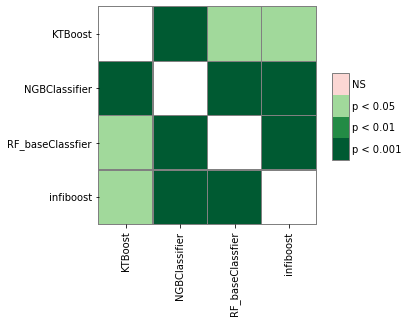

In [91]:
# -*- coding: utf-8 -*-
"""
Created on Sat Jul 18 18:44:38 2020

@author: oxenb
"""
import pandas as pd 
import scipy.stats
import scikit_posthocs as sp

def significancePlot(measuers_input,status):
    """create plot of significant values

    ----------
    measuers_input
    
    status
    
    Returns
    -------
    measuers_input {dataframe}
    """
    pc = sp.posthoc_conover(measuers_input, val_col=status, group_col='AlgoName', p_adjust = 'holm')
    print(pc)
    heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
    sp.sign_plot(pc, **heatmap_args)

def ReadMeasuers():
    """read measures from file
        
        ----------
         
        Returns
        -------
        measuers_input {dataframe}
    """
    #read measuers_input
    measuers_input = pd.read_csv('../data/results/measuers.csv')
    return measuers_input

def calcStatistics(status = "AUC"):
    """sum all the cv over the mueasuers values and do a fridman test
        
        ----------
        status - string, the value of measure to check significant by
         
        Returns
        -------
        result {list}  statistic - The test statistic, correcting for ties, P value
    """
    measuers_input = ReadMeasuers()
    def toSeconds(dt):
        dt = dt.split(" ")[2][:-3]
        dt = datetime.datetime.strptime(dt, '%H:%M:%S.%f')
        seconds = dt.second +  dt.minute*60 + dt.hour*3600
        return seconds
    if(status == "Training_Time"):

        measuers_input["Training_Time"] = measuers_input["Training_Time"].apply(toSeconds)
    
    measuers_input = measuers_input[["AlgoName","Dataset_Name",status]]
    measuers_input_mean = measuers_input.groupby(["AlgoName","Dataset_Name"]).mean().reset_index()
    measuers_input = measuers_input_mean[["AlgoName",status]].groupby("AlgoName")[status].apply(list)
    
    values = measuers_input.values
    KTboost = values[0]
    NGBclassifier = values[1]
    RF_baseClassifer = values[2]
    infiboost = values[3]
    result = scipy.stats.friedmanchisquare(KTboost,NGBclassifier,RF_baseClassifer,infiboost)
    significancePlot(measuers_input_mean,status)
    measuers_input_mean.groupby(["AlgoName"]).mean().reset_index().to_csv(f"../data/results/algo{status}mean.csv")
    return result

measuers_input = calcStatistics("Training_Time")